In [1]:
prices_a = [8.70, 8.91, 8.71]
#Return t2
8.91/8.70-1

0.024137931034482918

In [2]:
#Return t3
8.71/8.91-1

-0.022446689113355678

In [3]:
#Using slicing
#Return t2
prices_a[0]/prices_a[1]-1

-0.023569023569023684

In [4]:
#For all returns
prices_a[1:]/prices_a[:-1]-1

TypeError: unsupported operand type(s) for /: 'list' and 'list'

In [6]:
#Shit ! It does not work !
#How to do it using Numpy
import numpy as np
prices_b = np.array(prices_a)
prices_b

array([8.7 , 8.91, 8.71])

In [8]:
prices_b[1:]/prices_b[:-1]-1

array([ 0.02413793, -0.02244669])

In [9]:
#We can be more effective using Pandas
import pandas as pd
#Let's create two stocks
prices = pd.DataFrame({'BLUE':[8.70, 8.91, 8.71, 8.43, 8.73],
                       'ORANGE':[10.66, 11.08, 10.71, 11.59, 12.11]})
prices

,BLUE,ORANGE
0,8.70,10.66
1,8.91,11.08
2,8.71,10.71
3,8.43,11.59
4,8.73,12.11


In [10]:
prices.iloc[1:]/prices.iloc[:-1]-1

,BLUE,ORANGE
0,NaN,NaN
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,NaN,NaN


In [11]:
#It does not work because iloc aligns its index in computation ! This is why the result will always be 1 or 0 if there is -1 in the computation
#This is how we do it:
prices.iloc[1:].values/prices.iloc[:-1]-1

,BLUE,ORANGE
0,0.024138,0.039400
1,-0.022447,-0.033394
2,-0.032147,0.082166
3,0.035587,0.044866


In [12]:
#Only one of the two prices need to be values, since iloc cannot find the index of the variable that does not have one to align.

#Another way to do it:
prices/prices.shift(1)-1

,BLUE,ORANGE
0,NaN,NaN
1,0.024138,0.039400
2,-0.022447,-0.033394
3,-0.032147,0.082166
4,0.035587,0.044866


In [13]:
#The easiest way to do it:
prices.pct_change()

,BLUE,ORANGE
0,NaN,NaN
1,0.024138,0.039400
2,-0.022447,-0.033394
3,-0.032147,0.082166
4,0.035587,0.044866


In [14]:
#This is the same as using .shift()

In [15]:
data = pd.read_csv('W1S1 data/sample_prices.csv')
data

,BLUE,ORANGE
0,8.7000,10.6600
1,8.9055,11.0828
2,8.7113,10.7100
3,8.4346,11.5907
4,8.7254,12.1070
5,9.0551,11.7876
6,8.9514,11.2078
7,9.2439,12.5192
8,9.1276,13.3624
9,9.3976,14.4080


In [17]:
returns = data.pct_change()
returns

,BLUE,ORANGE
0,NaN,NaN
1,0.023621,0.039662
2,-0.021807,-0.033638
3,-0.031763,0.082232
4,0.034477,0.044544
5,0.037786,-0.026381
6,-0.011452,-0.049187
7,0.032676,0.117008
8,-0.012581,0.067353
9,0.029581,0.078249


<AxesSubplot:>

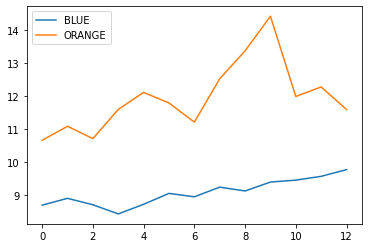

In [18]:
data.plot()

In [19]:
#Standard Deviation
returns.std()

BLUE      0.023977
ORANGE    0.079601
dtype: float64

In [20]:
#Returns mean
returns.mean()

BLUE      0.01
ORANGE    0.01
dtype: float64

In [21]:
#To get our structure (1+r) we can add 1 to our dataframe
returns+1

,BLUE,ORANGE
0,NaN,NaN
1,1.023621,1.039662
2,0.978193,0.966362
3,0.968237,1.082232
4,1.034477,1.044544
5,1.037786,0.973619
6,0.988548,0.950813
7,1.032676,1.117008
8,0.987419,1.067353
9,1.029581,1.078249


In [22]:
#To get the compounded return for all these returns
np.prod(returns+1)-1

BLUE      0.123310
ORANGE    0.087167
dtype: float64

In [23]:
(returns+1).prod()-1

BLUE      0.123310
ORANGE    0.087167
dtype: float64

In [24]:
(((returns+1).prod()-1)*100).round(2)

BLUE      12.33
ORANGE     8.72
dtype: float64

In [25]:
#Now annualizing a return
rm = 0.01
(1+rm)**12-1

0.12682503013196977

In [26]:
#Quarterly return
rq = 0.04
(1+rq)**4-1

0.1698585600000002

In [27]:
#Daily return
rd = 0.0001
(1+rd)**252-1

0.025518911987694626